# Project Name - Online Retail Customer Segmentation

Project Type - Unsupervised

Contribution - Individual

# Project Summary

In the "Online Retail Customer Segmentation" project, we aimed to help an online retail company better understand its customers and tailor its marketing strategies more effectively. The dataset contained information on 541,909 transactions, with 8 columns, which included details like the products purchased, their quantities, and the customers involved. Our goal was to group these customers into meaningful segments without any prior labels or categories. We employed an unsupervised learning approach to accomplish this.

Unsupervised learning is like organizing a jigsaw puzzle without the picture on the box. We don't know what the final image should look like, but we try to find similarities and patterns among the puzzle pieces (the data). In this project, we didn't have pre-defined customer groups, so we needed to discover them ourselves.

We started by cleaning the data, making sure it was accurate and complete. Then, we used various mathematical techniques to group customers based on their buying habits, preferences, and behaviors. These techniques allowed us to find customers who shared common traits, such as similar spending patterns, product preferences, or shopping frequencies.

Customer segmentation is crucial because it helps businesses like this online retailer personalize their interactions with different customer groups. For example, they can send tailored promotions or product recommendations to each segment, improving the chances of making sales. Moreover, it helps with inventory management, as the retailer can better anticipate what products are likely to be in demand for each segment.

In this project, our unsupervised learning methods provided valuable insights into the customer base, allowing the online retailer to make data-driven decisions. By understanding its customers better, the company can enhance its marketing efforts and provide a more satisfying shopping experience. Customer segmentation is a powerful tool for businesses, helping them grow and thrive in the competitive world of online retail.






# GitHub Link -

https://github.com/LOHANA1026/Online-Retail-Customer-Segmentation

# Problem Statement

Imagine there's an online store with lots of customers, and they've collected data from 541,909 shopping transactions. The data includes information like what people bought, how much they bought, and who these customers are. The store wants to be smarter about how they interact with their customers. They want to group these customers into categories, like "big spenders," "occasional shoppers," or "frequent buyers," but they don't know what these categories are in advance.

So, the problem is this: How can we use this data to automatically figure out which customers are similar and belong to the same group? We're like detectives looking for clues in the data to help the store understand its customers better. By doing this, the online store can send personalized deals or product suggestions to different customer groups, making customers happier and increasing sales. This is like giving each group of customers what they like, which makes them more likely to buy things from the store.

To solve this, we'll use a special type of computer magic called "unsupervised learning." It's like teaching a computer to find hidden patterns and group customers based on their shopping habits, without anyone telling the computer what these groups should look like. This way, we'll help the online store make smarter decisions and make their customers even more satisfied with their shopping experience.

# Let's Begin !

In [ ]:
pip install kneed

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import NearestNeighbors
import scipy
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

Loading the dataset

In [ ]:
#mounting the data set
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the csv file
df =pd.read_csv("/content/drive/MyDrive/Almabetter Project/Online Retail Customer Segmentation /ORC.csv",encoding= 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


Interpreting the content of the dataset

In [ ]:
df.shape

(541909, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### Feature Extraction

In [ ]:
df.InvoiceDate = pd.to_datetime(df.InvoiceDate)

In [ ]:
df['Invoice_Year'] = df.InvoiceDate.dt.year
df['Invoice_Month'] = df.InvoiceDate.dt.month
df['Invoice_Day'] = df.InvoiceDate.dt.day
df['Invoice_WeekDay'] = df.InvoiceDate.dt.weekday

In [ ]:
df['Total Price'] = df.Quantity * df.UnitPrice

Customer ID is a unique identifier for each customer so it won't have any significance as far as clustering is concerned.

### Feature Preparation

In [ ]:
df = df[(df.Quantity>0) & (df.UnitPrice>0)]
df.shape

(530104, 13)

In [ ]:
X = df.drop(['InvoiceNo','StockCode','InvoiceDate','CustomerID'],axis=1)

### Categorical Encoding

In [ ]:
encoder = LabelEncoder()
X.Description = encoder.fit_transform(X.Description.astype(str))
X.Description = X.Description.astype(np.int64)

Outlier Treatment

In [ ]:
for col in X.columns:
    if X[col].dtypes != object:
        lower_limit, upper_limit = X[col].quantile([0.25,0.75])
        IQR = upper_limit - lower_limit
        lower_whisker = lower_limit - 1.5 * IQR
        upper_whisker = upper_limit + 1.5 * IQR
        index = X[(X[col]<lower_whisker) & (X[col]>upper_whisker)].index
        X.drop(index,inplace=True)

### EDA

<Axes: >

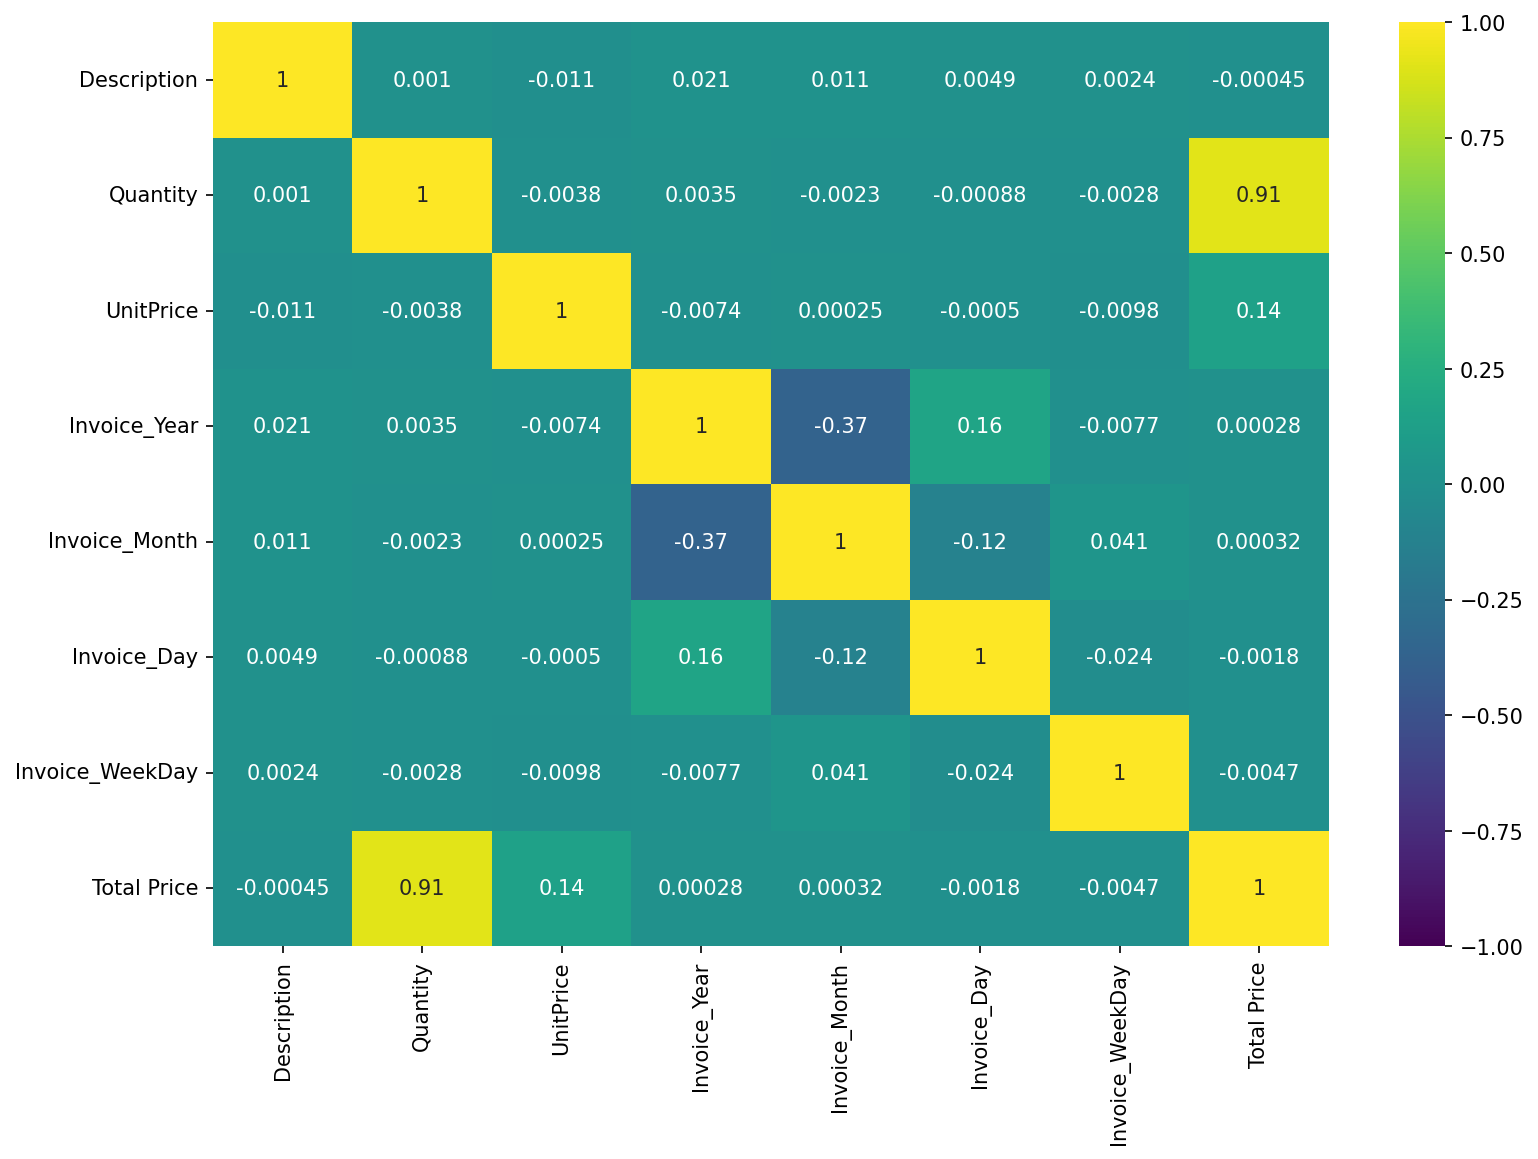

In [ ]:
plt.figure(figsize=(12,8),dpi=150)
sns.heatmap(X.corr(),annot=True,cmap='viridis',vmin=-1,vmax=1)

<Axes: xlabel='Quantity', ylabel='Total Price'>

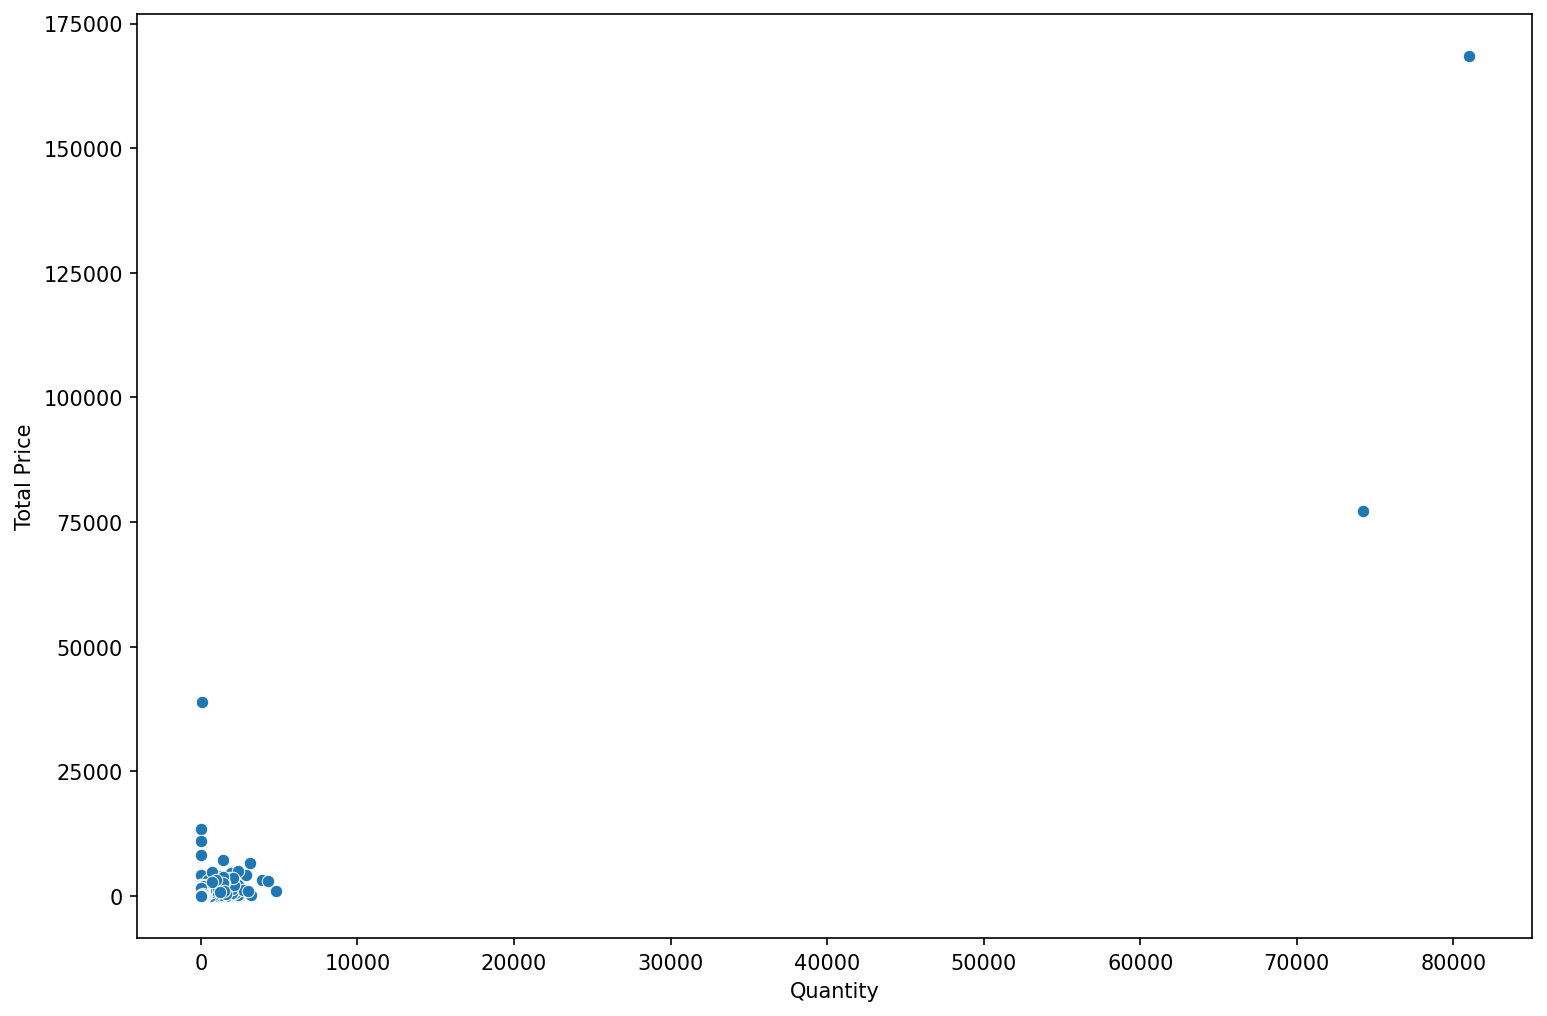

In [ ]:
plt.figure(figsize=(12,8),dpi=150)
sns.scatterplot(data=X,x='Quantity',y='Total Price')

In [ ]:
X.describe()

,Description,Quantity,UnitPrice,Invoice_Year,Invoice_Month,Invoice_Day,Invoice_WeekDay,Total Price
count,530104.000000,530104.000000,530104.000000,530104.000000,530104.000000,530104.000000,530104.000000,530104.000000
mean,2080.782282,10.542037,3.907625,2010.921751,7.560611,15.020922,2.436626,20.121871
std,1127.280809,155.524124,35.915681,0.268563,3.508496,8.661560,1.850651,270.356743
min,0.000000,1.000000,0.001000,2010.000000,1.000000,1.000000,0.000000,0.001000
25%,1166.000000,1.000000,1.250000,2011.000000,5.000000,7.000000,1.000000,3.750000
50%,2038.000000,3.000000,2.080000,2011.000000,8.000000,15.000000,2.000000,9.900000
75%,3062.000000,10.000000,4.130000,2011.000000,11.000000,22.000000,4.000000,17.700000
max,4025.000000,80995.000000,13541.330000,2011.000000,12.000000,31.000000,6.000000,168469.600000


<Axes: xlabel='Invoice_Year'>

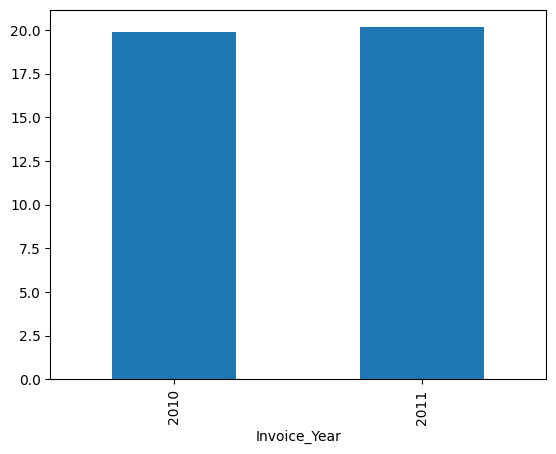

In [ ]:
X.groupby('Invoice_Year')['Total Price'].mean().plot(kind='bar')

<Axes: ylabel='count'>

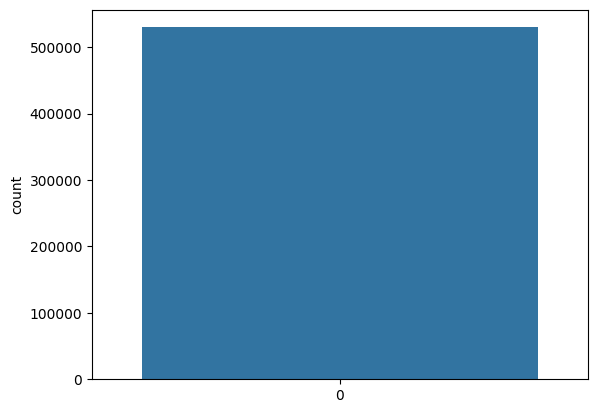

In [ ]:
sns.countplot(X.Invoice_Year)

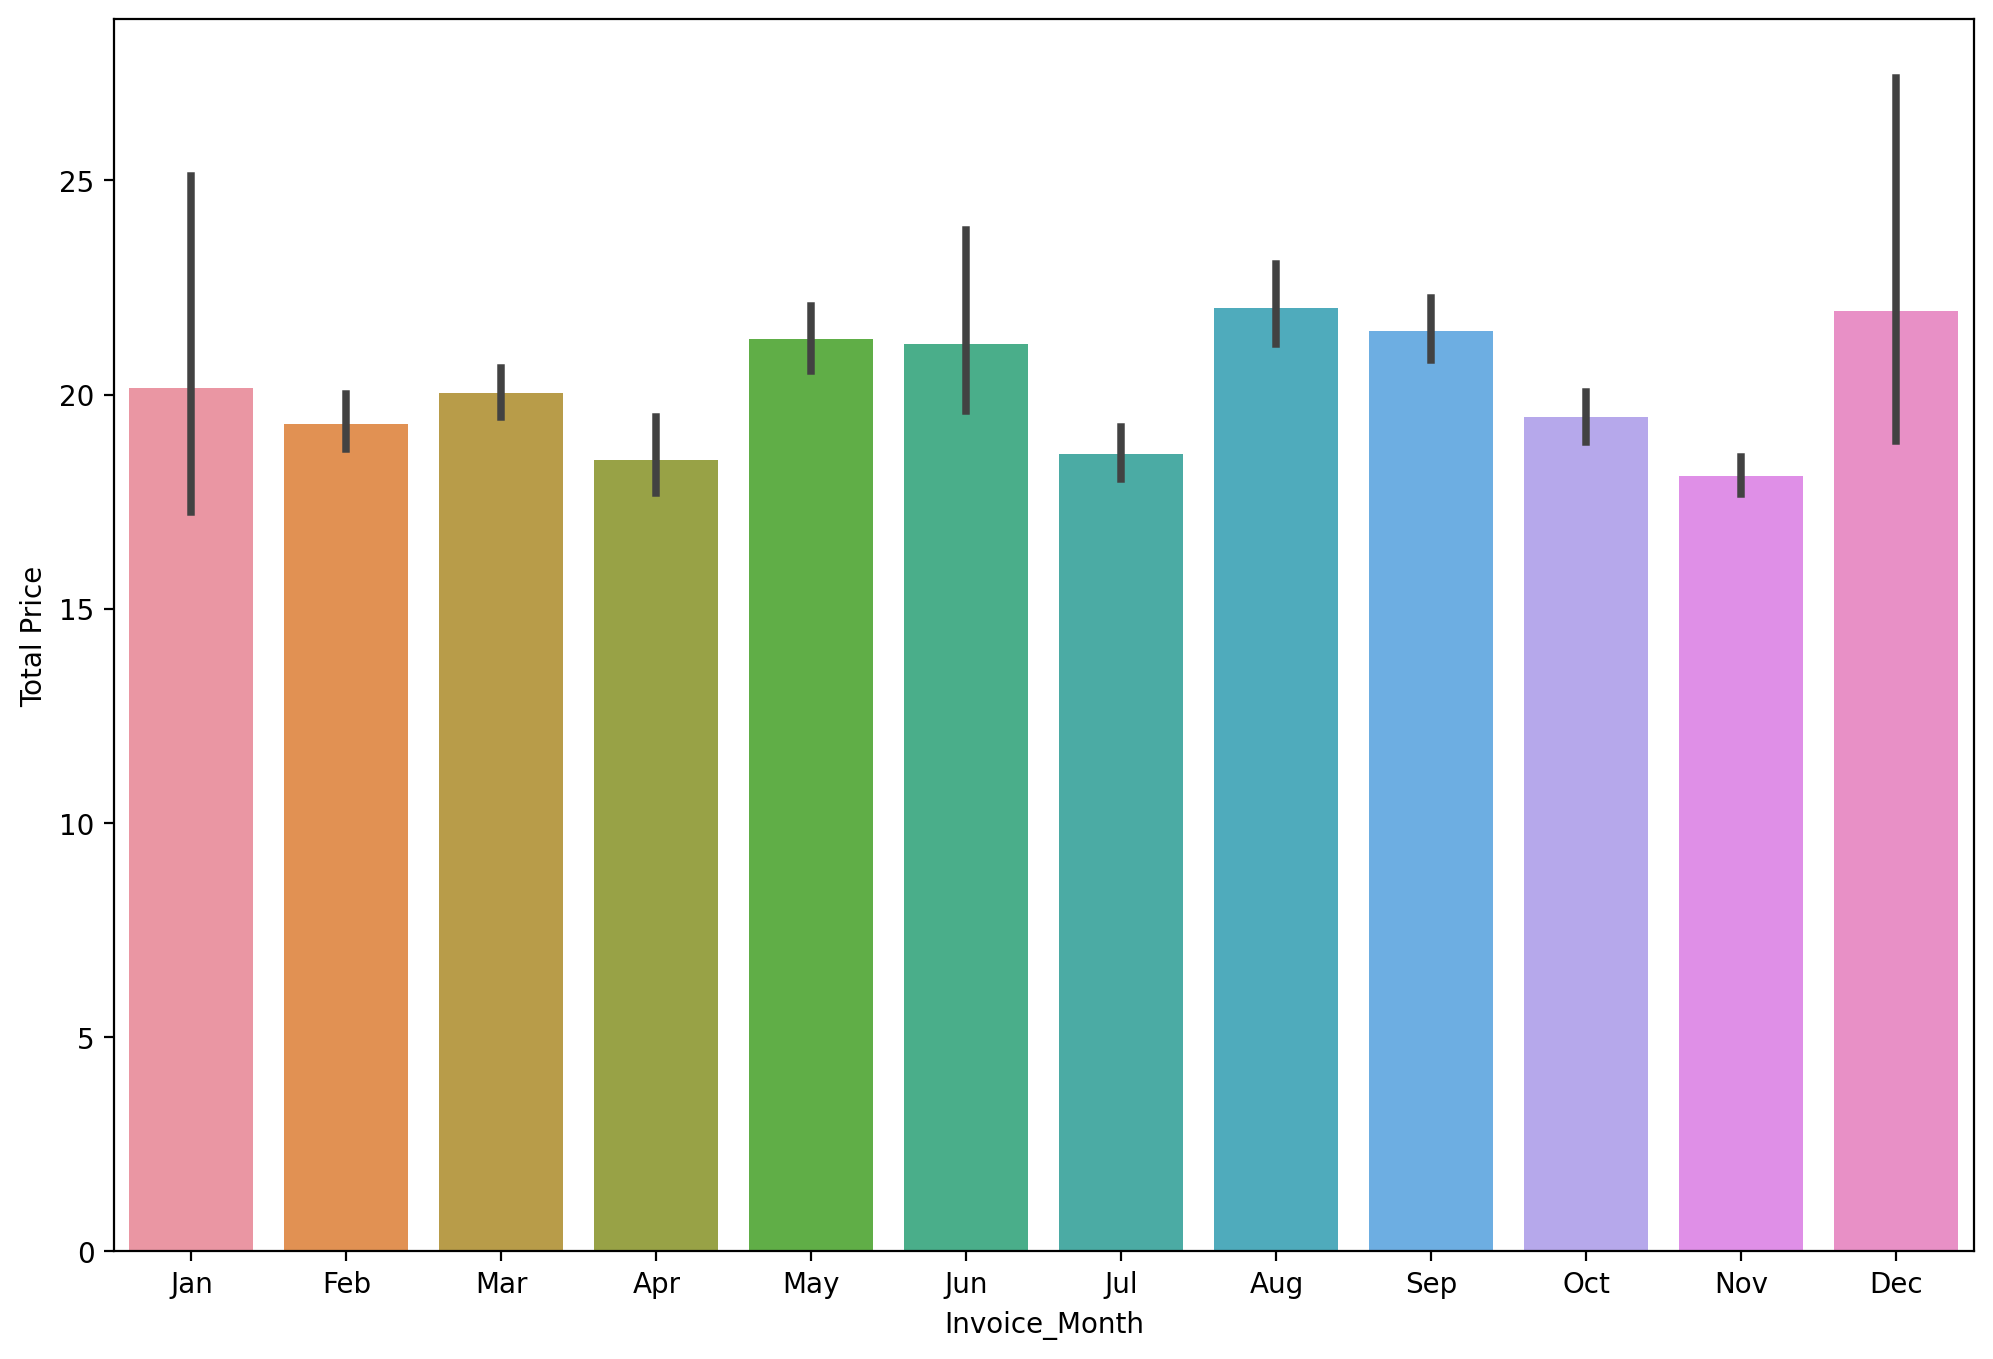

In [ ]:
plt.figure(figsize=(12,8),dpi=200)
ax = sns.barplot(data=X,x='Invoice_Month',y='Total Price')
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']);

<Axes: xlabel='Invoice_Day', ylabel='Total Price'>

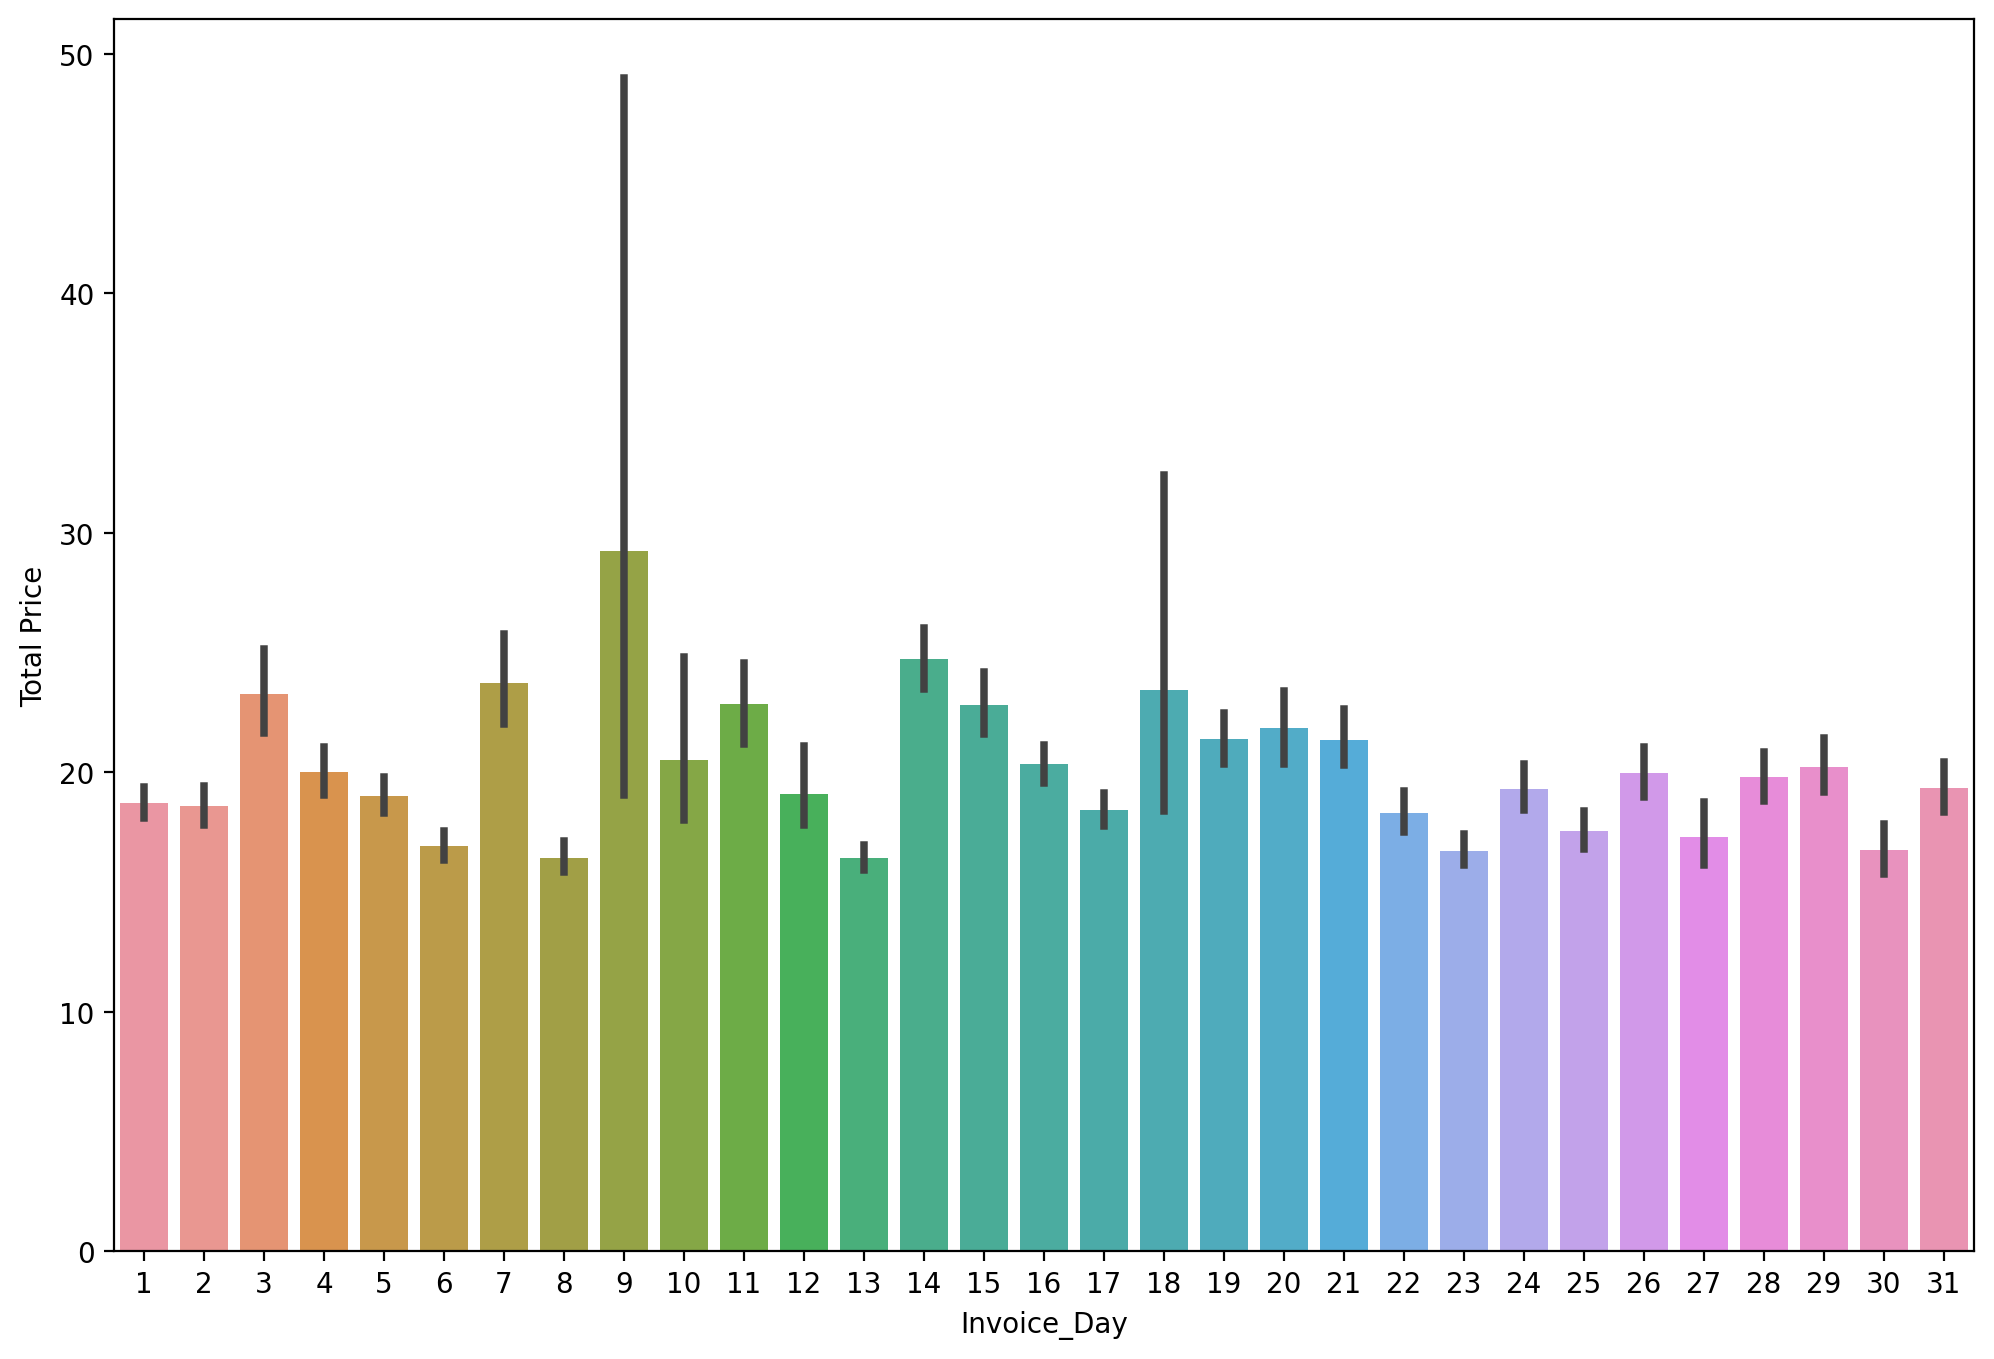

In [ ]:
plt.figure(figsize=(12,8),dpi=200)
sns.barplot(data=X,x='Invoice_Day',y='Total Price')

### Univariate Analysis

Skewness of Quantity: 471.7277163313442
Kurtosis of Quantity: 236462.34282634672


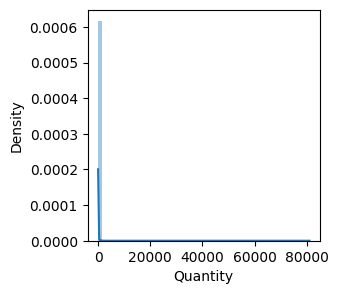

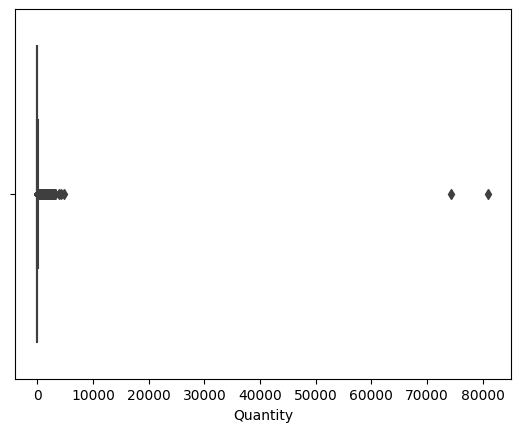

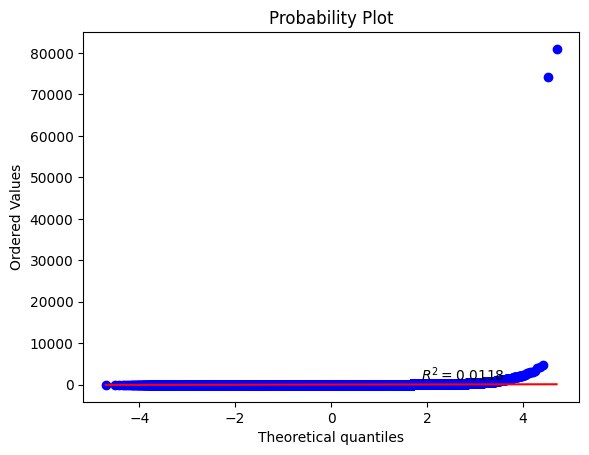

Skewness of UnitPrice: 206.08755495006463
Kurtosis of UnitPrice: 62483.14271510476


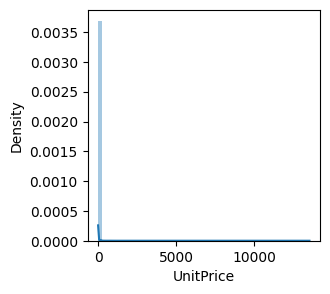

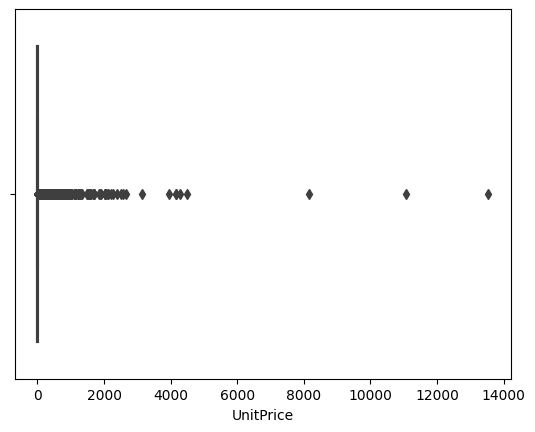

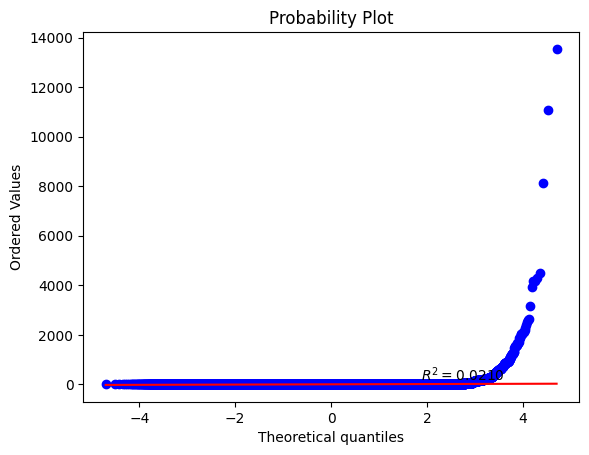

Skewness of Invoice_Year: -3.140811448329451
Kurtosis of Invoice_Year: 7.8647262263308715


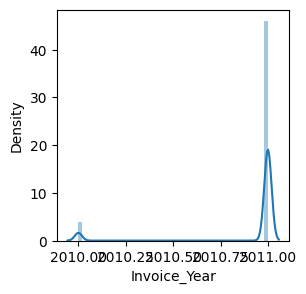

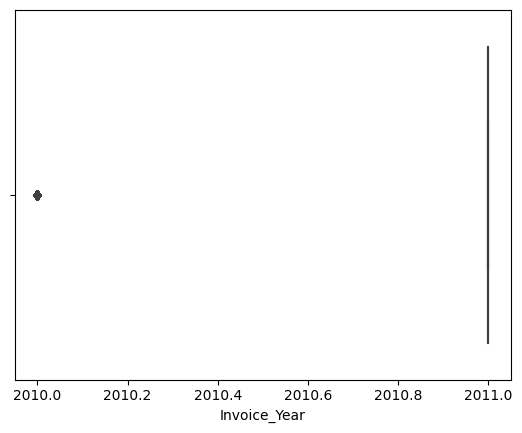

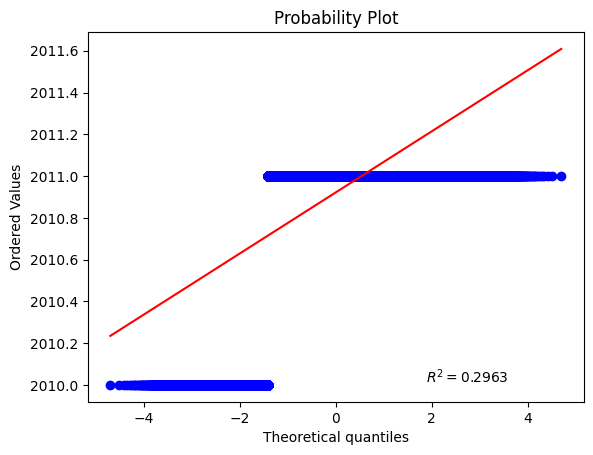

Skewness of Invoice_Month: -0.41841228696053556
Kurtosis of Invoice_Month: -1.1169946588288


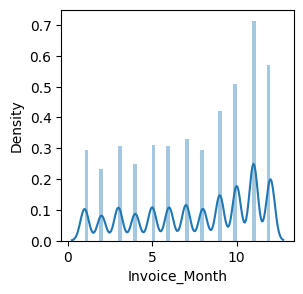

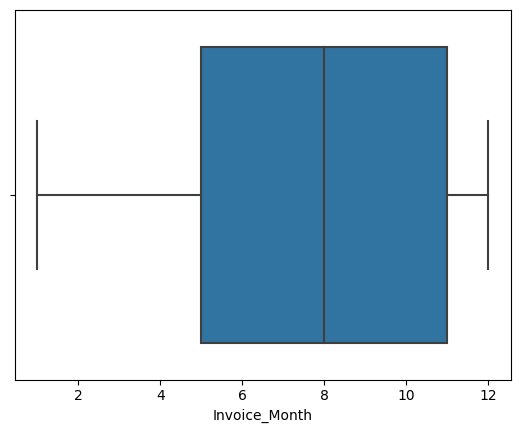

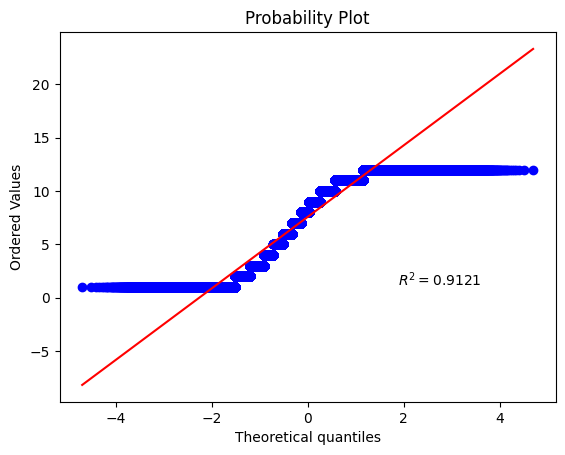

Skewness of Invoice_Day: 0.14208619030549433
Kurtosis of Invoice_Day: -1.1574107092128816


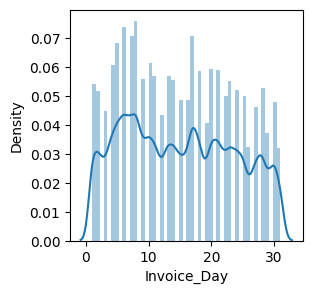

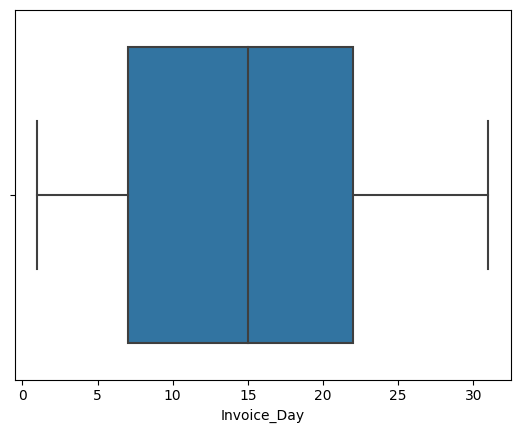

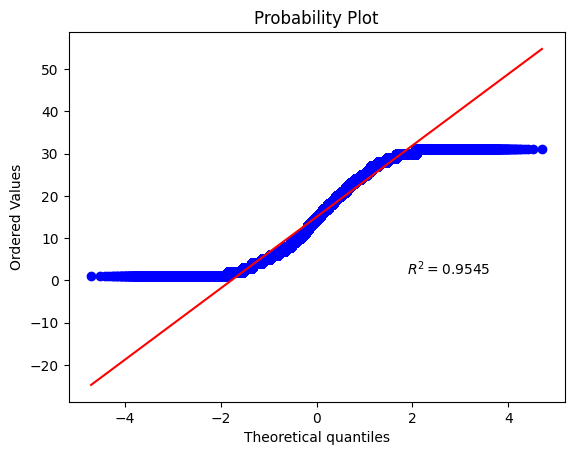

Skewness of Invoice_WeekDay: 0.4661824816962572
Kurtosis of Invoice_WeekDay: -0.6675789760994388


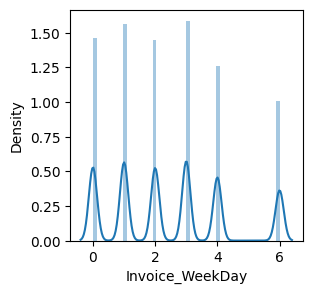

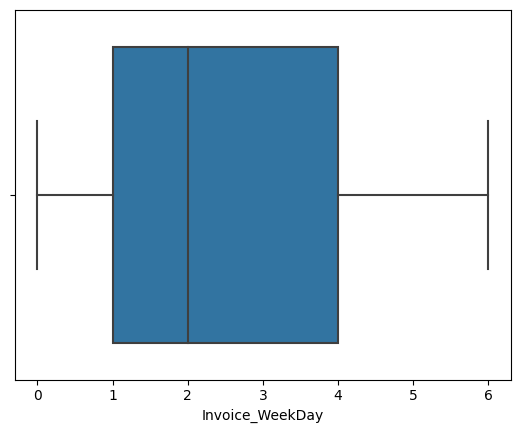

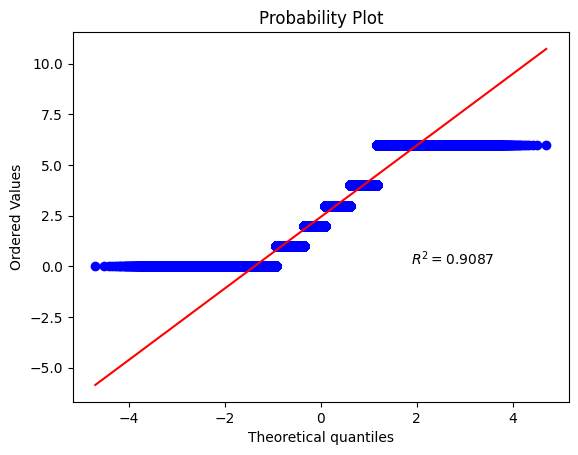

Skewness of Total Price: 506.7060119422723
Kurtosis of Total Price: 297651.6610458157


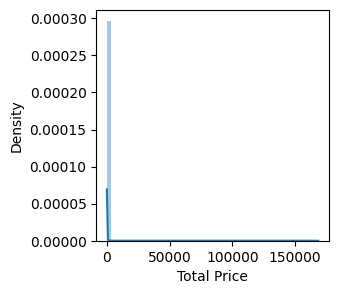

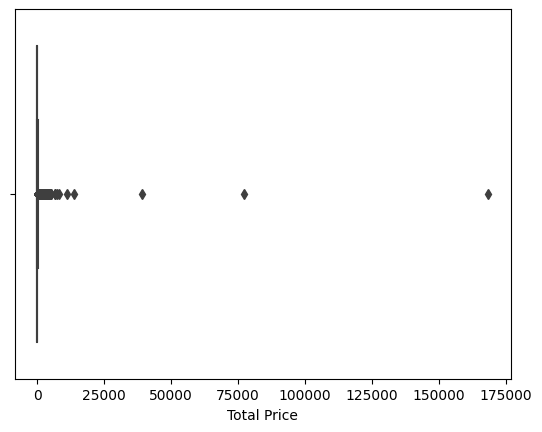

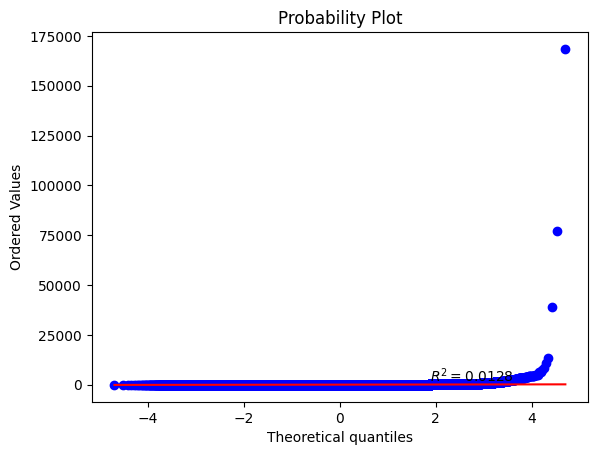

In [ ]:
for col in X.columns:
    if col not in ['Description','InvoiceYear']:
        if X[col].dtypes != object:
            print("Skewness of {}:".format(col),X[col].skew())
            print("Kurtosis of {}:".format(col),X[col].kurt())
            plt.figure(figsize=(3,3),dpi=100)
            sns.distplot(X[col])
            plt.show()
            sns.boxplot(data=X,x=col)
            plt.show()
            scipy.stats.probplot(X[col],plot=plt,rvalue=True)
            plt.show()

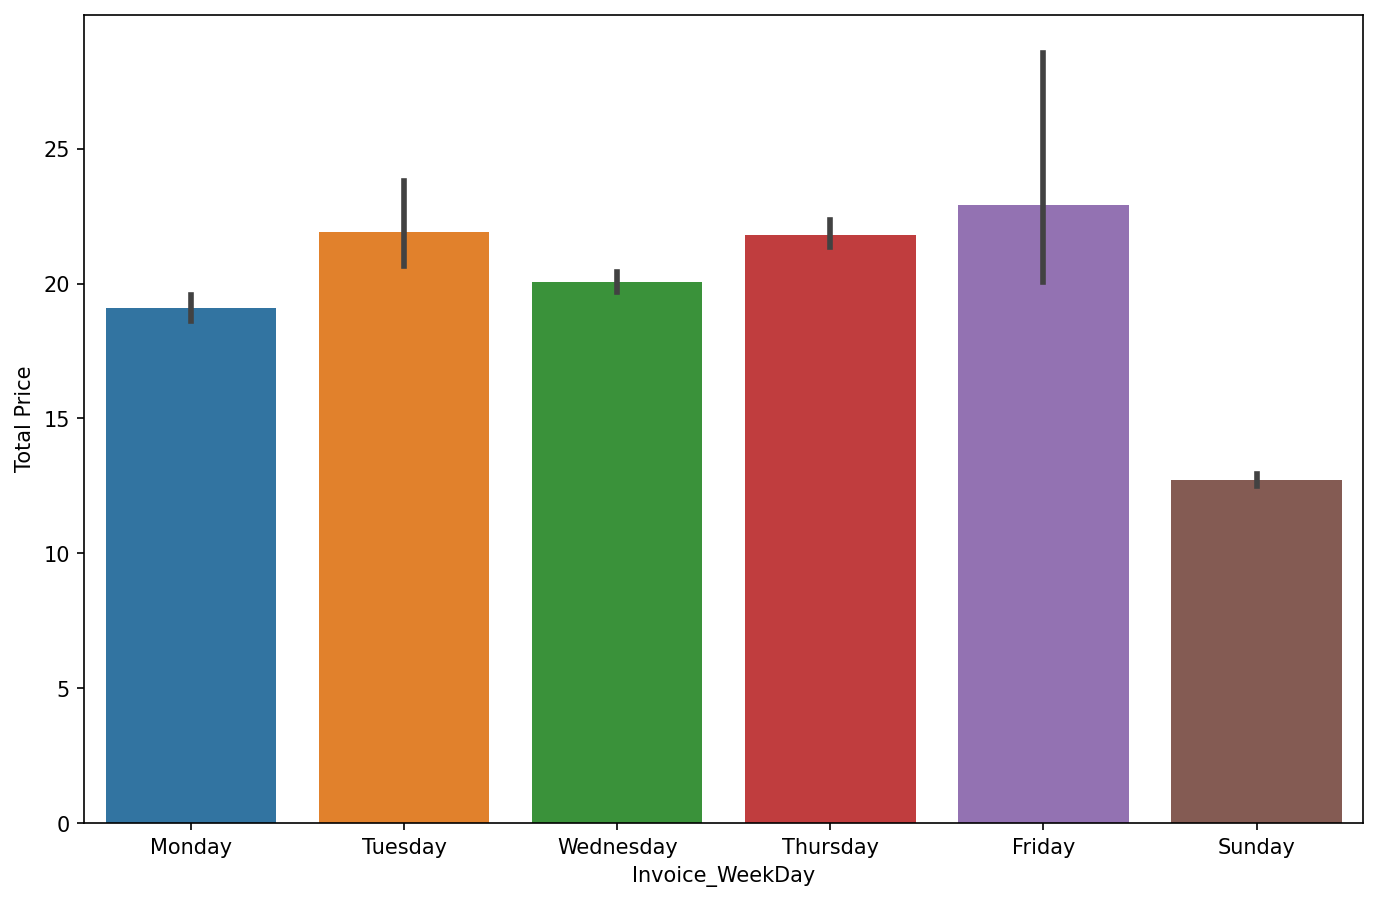

In [ ]:
plt.figure(figsize=(11,7),dpi=150)
ax = sns.barplot(data=X,x='Invoice_WeekDay',y='Total Price')
ax.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday', 'Sunday']);

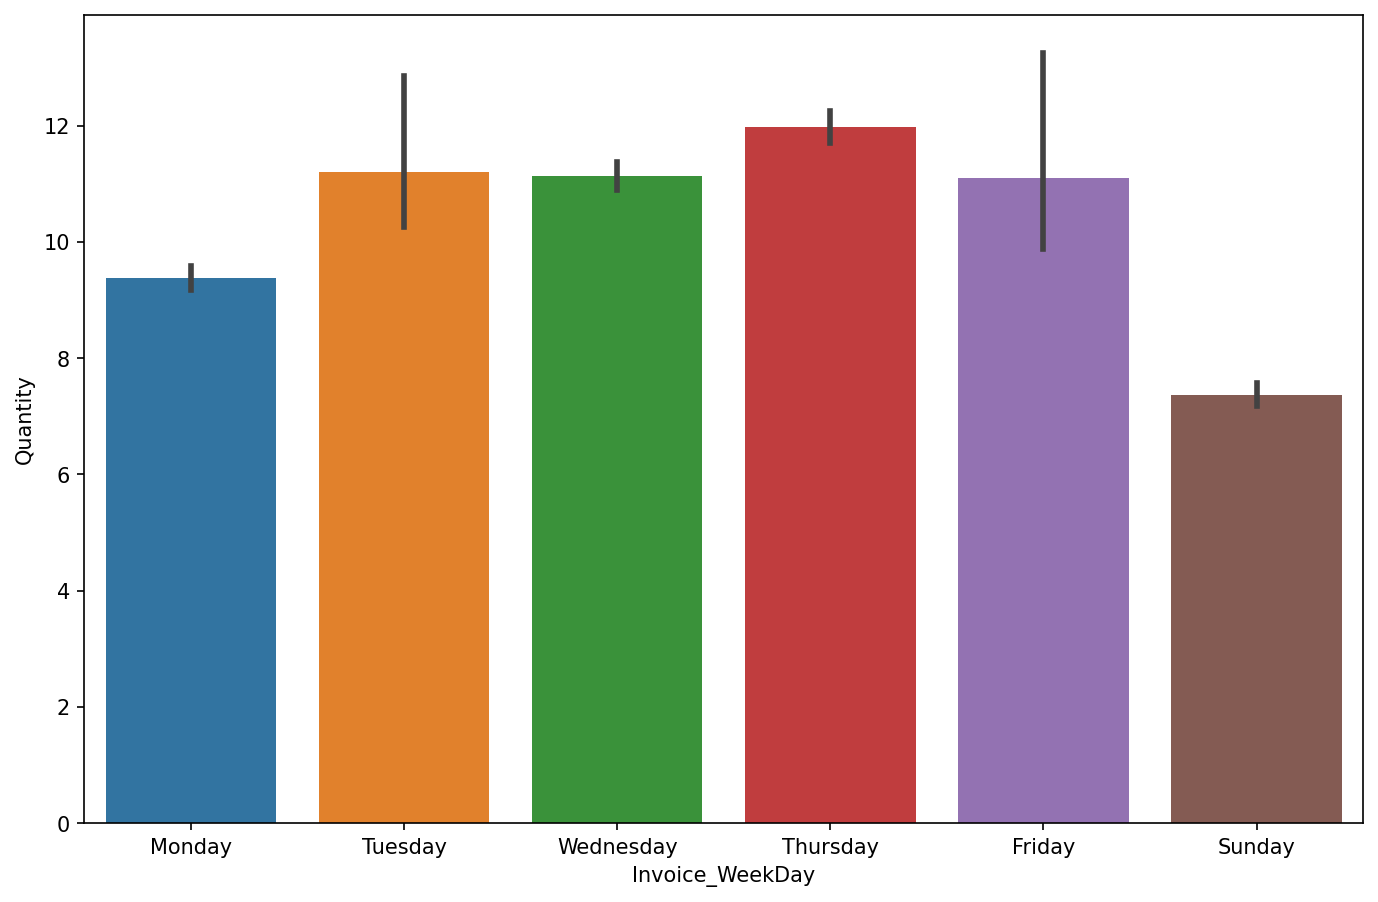

In [ ]:
plt.figure(figsize=(11,7),dpi=150)
ax = sns.barplot(data=X,x='Invoice_WeekDay',y='Quantity')
ax.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Sunday']);

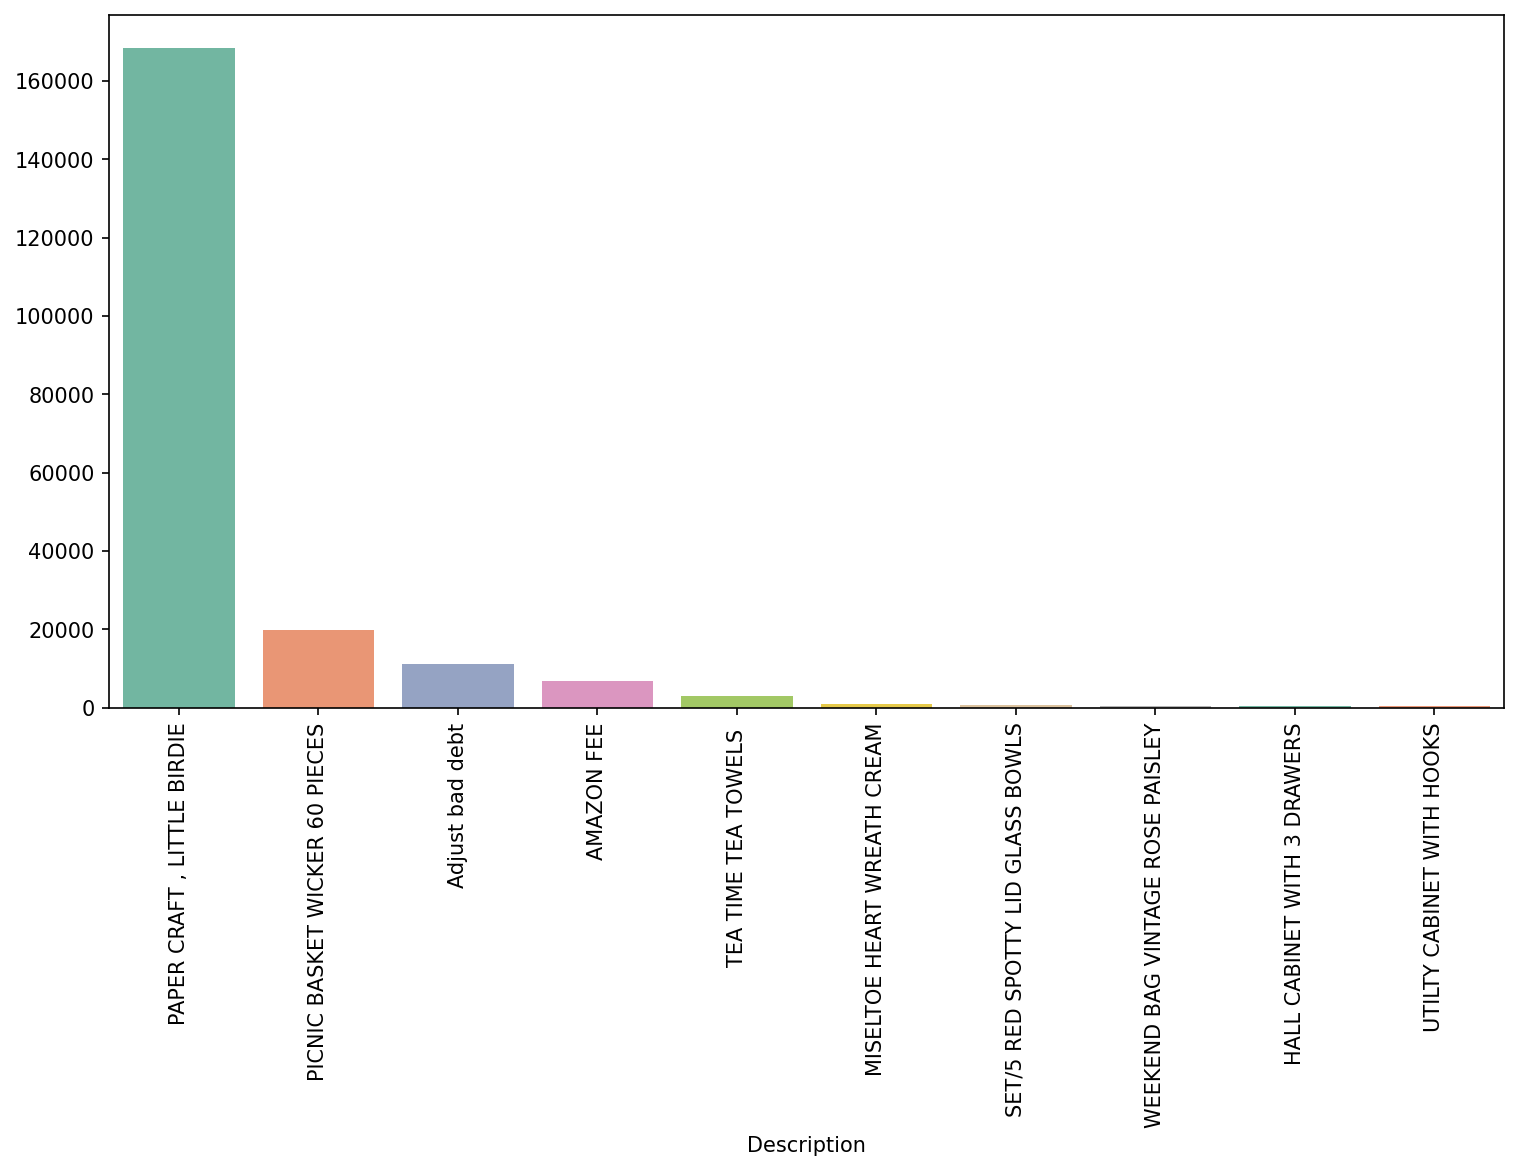

In [ ]:
plt.figure(figsize=(12, 6), dpi=150)
sns.barplot(
    x=df.groupby('Description')['Total Price'].mean().sort_values(ascending=False)[:10].index,
    y=df.groupby('Description')['Total Price'].mean().sort_values(ascending=False)[:10].values,
    palette='Set2'
)
plt.xticks(rotation=90)
plt.show()

### Feature Engineering Continued

In [ ]:
X = pd.get_dummies(X)
X.head()

,Description,Quantity,UnitPrice,Invoice_Year,Invoice_Month,Invoice_Day,Invoice_WeekDay,Total Price,Country_Australia,Country_Austria,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,3844,6,2.55,2010,12,1,2,15.30,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3852,6,3.39,2010,12,1,2,20.34,0,0,...,0,0,0,0,0,0,0,0,1,0
2,888,8,2.75,2010,12,1,2,22.00,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1859,6,3.39,2010,12,1,2,20.34,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2849,6,3.39,2010,12,1,2,20.34,0,0,...,0,0,0,0,0,0,0,0,1,0


### Feature Scaling

In [ ]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X = pd.DataFrame(scaled_X,columns=X.columns)
scaled_X.head()

,Description,Quantity,UnitPrice,Invoice_Year,Invoice_Month,Invoice_Day,Invoice_WeekDay,Total Price,Country_Australia,Country_Austria,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,1.564135,-0.029205,-0.037800,-3.432164,1.265327,-1.618754,-0.235931,-0.017835,-0.047273,-0.027411,...,-0.01037,-0.00412,-0.020469,-0.068614,-0.02918,-0.061012,-0.018379,-0.011327,0.304501,-0.029018
1,1.571232,-0.029205,-0.014412,-3.432164,1.265327,-1.618754,-0.235931,0.000807,-0.047273,-0.027411,...,-0.01037,-0.00412,-0.020469,-0.068614,-0.02918,-0.061012,-0.018379,-0.011327,0.304501,-0.029018
2,-1.058107,-0.016345,-0.032232,-3.432164,1.265327,-1.618754,-0.235931,0.006947,-0.047273,-0.027411,...,-0.01037,-0.00412,-0.020469,-0.068614,-0.02918,-0.061012,-0.018379,-0.011327,0.304501,-0.029018
3,-0.196741,-0.029205,-0.014412,-3.432164,1.265327,-1.618754,-0.235931,0.000807,-0.047273,-0.027411,...,-0.01037,-0.00412,-0.020469,-0.068614,-0.02918,-0.061012,-0.018379,-0.011327,0.304501,-0.029018
4,0.681479,-0.029205,-0.014412,-3.432164,1.265327,-1.618754,-0.235931,0.000807,-0.047273,-0.027411,...,-0.01037,-0.00412,-0.020469,-0.068614,-0.02918,-0.061012,-0.018379,-0.011327,0.304501,-0.029018


In [ ]:
scaled_X.drop('Invoice_Year',axis=1,inplace=True)
X.drop('Invoice_Year',axis=1,inplace=True)

### Model Training & Assessment

In [ ]:
kmeans_model = KMeans()
cluster_labels = kmeans_model.fit_predict(scaled_X)
cluster_labels

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [ ]:
ssd = []

for i in range(2,13):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_X)
    ssd.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Method')

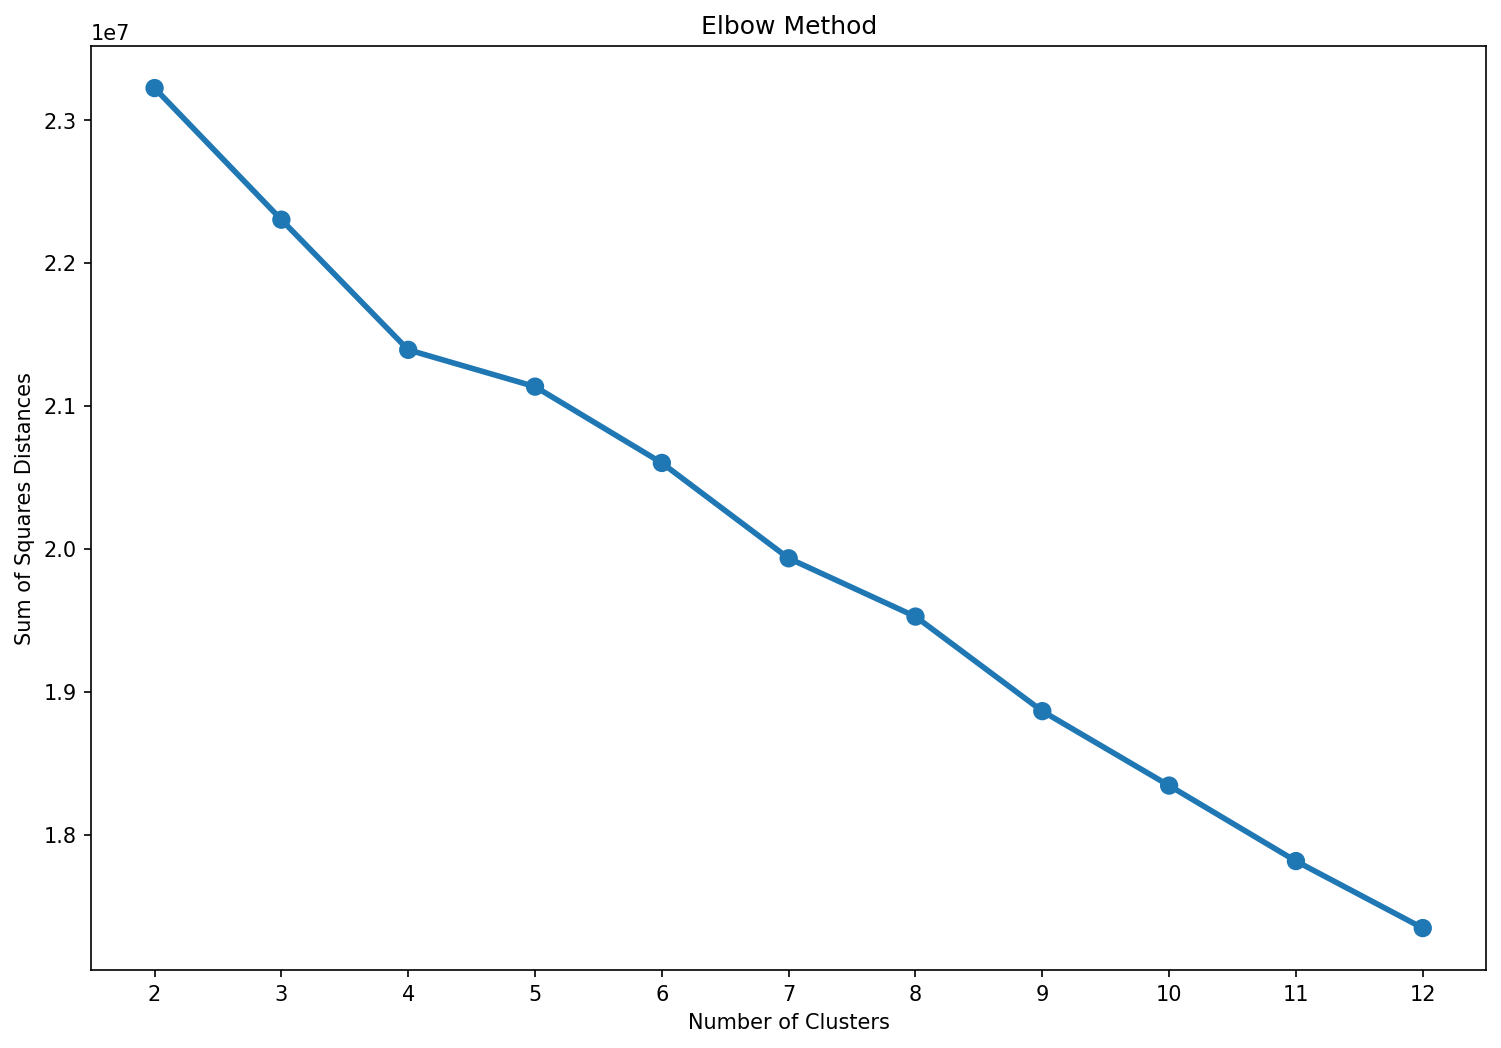

In [ ]:
plt.figure(figsize=(12,8),dpi=150)
sns.pointplot(x=np.arange(2,13), y=ssd)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squares Distances')
plt.title('Elbow Method')

In [ ]:
model = KMeans(n_clusters=12,random_state=101)
model.fit(scaled_X)

KMeans(n_clusters=12, random_state=101)

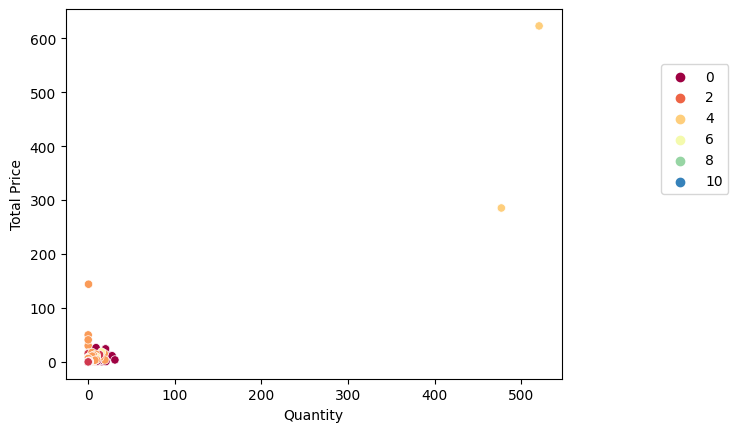

In [ ]:
sns.scatterplot(data=scaled_X,x='Quantity',y='Total Price',hue=model.labels_,palette='Spectral')
plt.legend(loc=(1.2,0.5))

In [ ]:
scaled_X['Segment'] = model.labels_
X['Segment'] = model.labels_

<Axes: xlabel='Segment'>

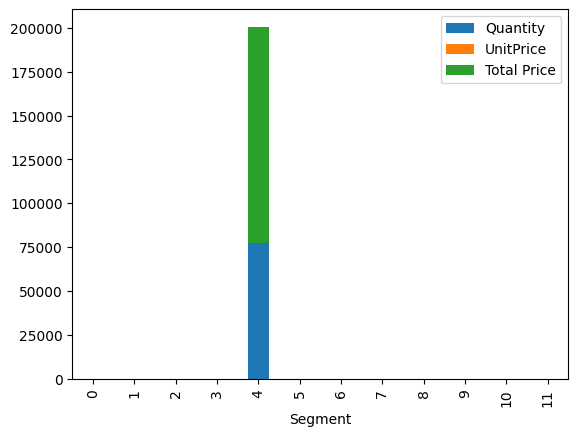

In [ ]:
X.groupby('Segment')[['Quantity','UnitPrice','Total Price']].mean().plot(kind='bar',stacked=True)

In [ ]:
temp = scaled_X.sample(n=15000)
silhouette_score(temp,temp.Segment)

0.41786402563203856

### Density-based Spatial Clustering of Applications with Noise(DBSCAN)

In [ ]:
temp = scaled_X.sample(n=10000)

In [ ]:
dbscan = DBSCAN()
dbscan.fit(temp)

DBSCAN()

In [ ]:
percent_outliers = []
min_samples = 2 * temp.shape[1]

for eps in np.linspace(0.001,5,50):
    dbscan = DBSCAN(eps=eps,min_samples=min_samples)
    dbscan.fit(temp)
    percent_outliers.append(np.sum(dbscan.labels_==-1)/len(dbscan.labels_))

Text(0, 0.5, 'Percentage of Outliers')

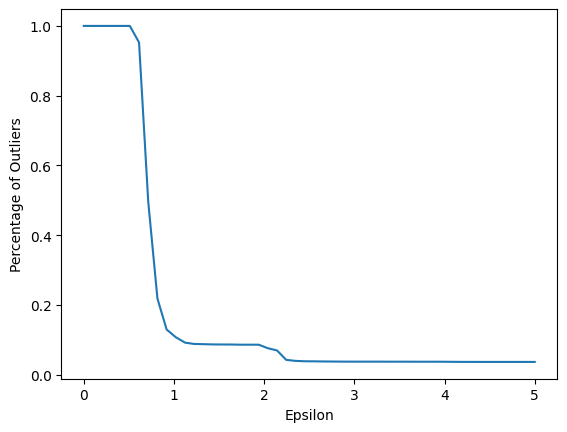

In [ ]:
sns.lineplot(x=np.linspace(0.001,5,50),y=percent_outliers)
plt.xlabel('Epsilon')
plt.ylabel('Percentage of Outliers')

### Optimized DBSCAN Model

In [ ]:
silhouette_scores = []

for i in np.linspace(1.5,5,50):
    dbscan = DBSCAN(eps=i)
    dbscan.fit(temp)
    temp['Segment'] = dbscan.labels_
    silhouette_scores.append(silhouette_score(temp,temp.Segment))

Text(0, 0.5, 'Silhouette Score')

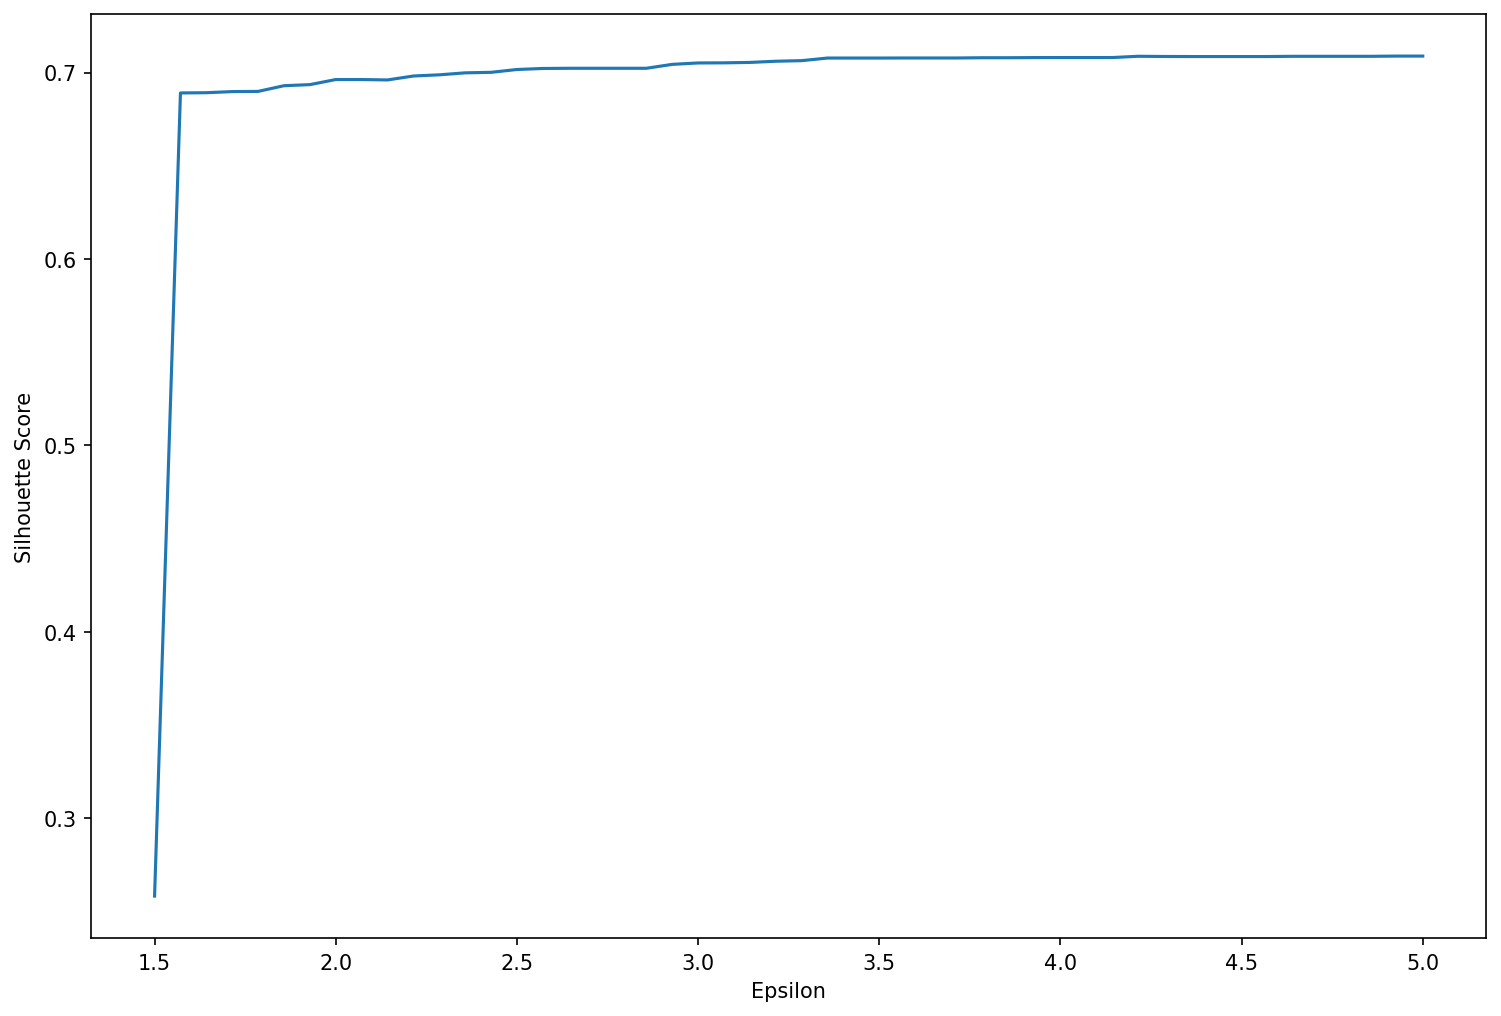

In [ ]:
plt.figure(figsize=(12,8),dpi=150)
sns.lineplot(x=np.linspace(1.5,5,50),y=silhouette_scores)
plt.xlabel('Epsilon')
plt.ylabel('Silhouette Score')

In [ ]:
def get_kdist_plot(X=None, k=None, radius_nbrs=1.0):
    nbrs = NearestNeighbors(n_neighbors=k, radius=radius_nbrs).fit(X)
    distances, indices = nbrs.kneighbors(X)
    distances = np.sort(distances[:,k-1], axis=0)
    plt.figure(figsize=(8,8))
    plt.plot(distances)
    plt.xlabel("Points")
    plt.ylabel("Distance")
    plt.show()
    i = np.arange(len(distances))
    knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
    knee.plot_knee()
    plt.xlabel("Points")
    plt.ylabel("Distance")
    plt.show()
    return distances[knee.knee]

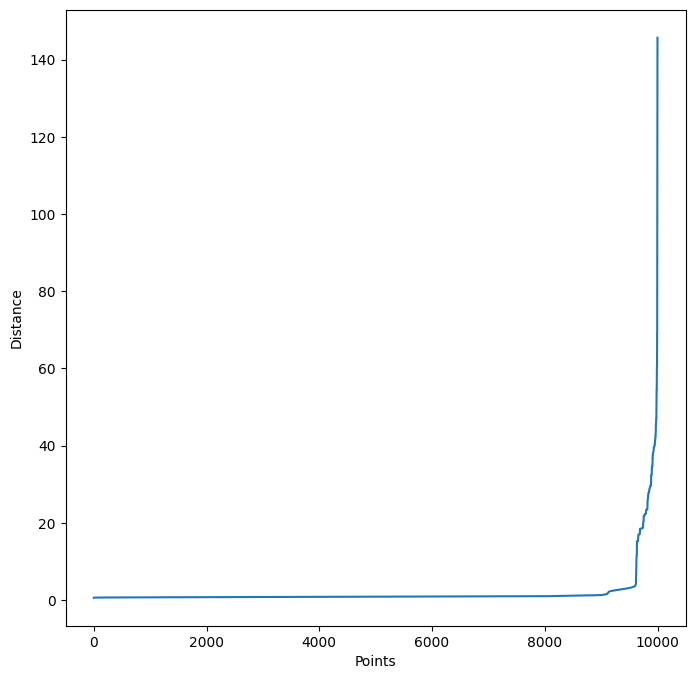

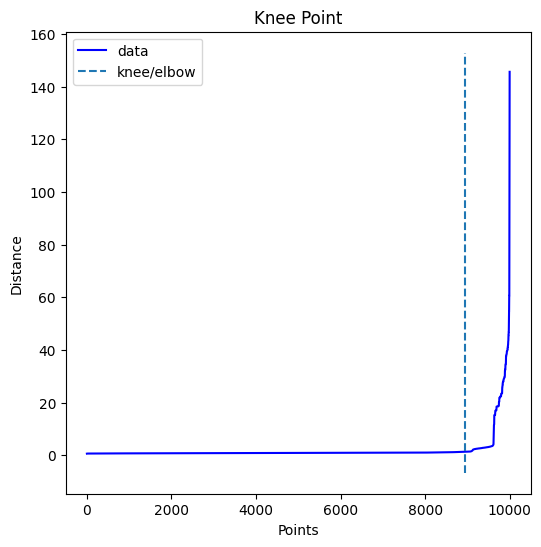

Knee Point: 1.24616985360659


In [ ]:
k = 2 * temp.shape[-1]
x = get_kdist_plot(temp,k)
print("Knee Point:",x)

**Now, let's try to find out the optimum value of min_samples hyperparameter as we have already found the best possible eps value..**

In [ ]:
min_samples_values = np.linspace(3, min_samples, 50)
silhouette_scores = []

for i in min_samples_values:
    dbscan = DBSCAN(eps=x, min_samples=int(i))
    dbscan.fit(temp)
    temp['Segment'] = dbscan.labels_
    silhouette = silhouette_score(temp, temp['Segment'])
    silhouette_scores.append(silhouette)

Text(0, 0.5, 'Silhouette Score')

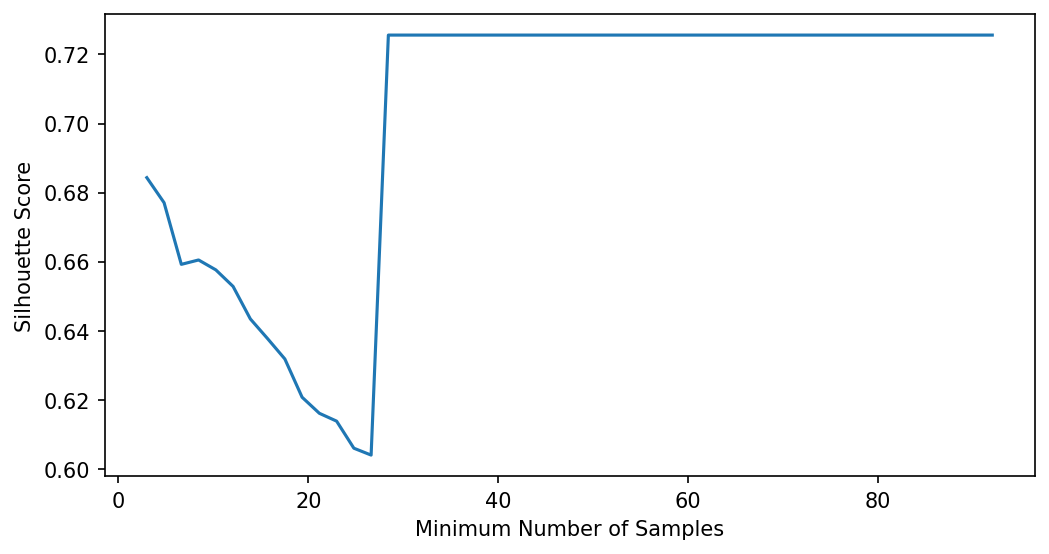

In [ ]:
plt.figure(figsize=(8,4),dpi=150)
sns.lineplot(x=min_samples_values,y=silhouette_scores)
plt.xlabel('Minimum Number of Samples')
plt.ylabel('Silhouette Score')

47


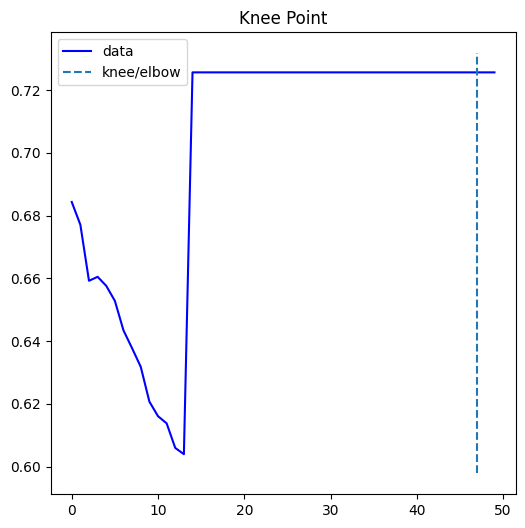

In [ ]:
knee = KneeLocator(np.arange(len(silhouette_scores)), silhouette_scores, S=1, curve='convex', direction='increasing', interp_method='polynomial')
knee.plot_knee()
print(np.arange(len(silhouette_scores))[knee.knee])

In [ ]:
dbscan_model = DBSCAN(eps=x,min_samples=2*min_samples)
dbscan_model.fit(temp)

DBSCAN(eps=1.24616985360659, min_samples=184)

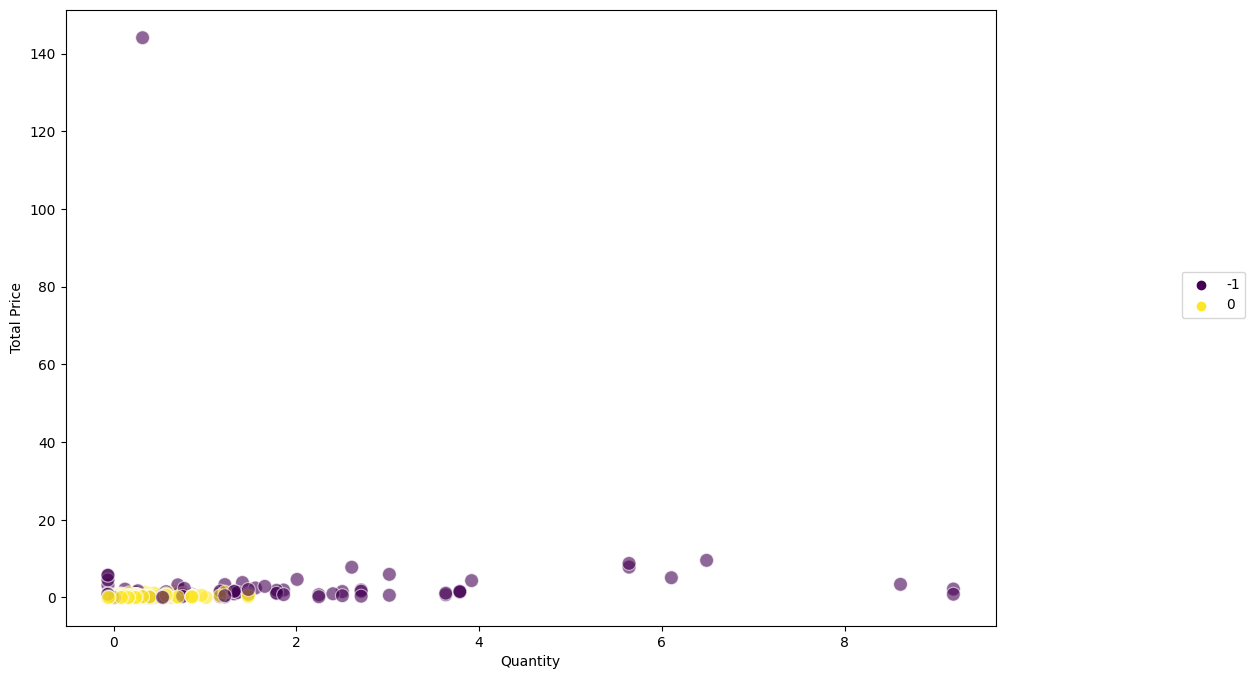

In [ ]:
plt.figure(figsize=(12,8),dpi=100)
sns.scatterplot(x=temp.Quantity,y=temp['Total Price'],hue=dbscan_model.labels_,palette='viridis',s=100,alpha=0.6)
plt.legend(loc=(1.2,0.5))

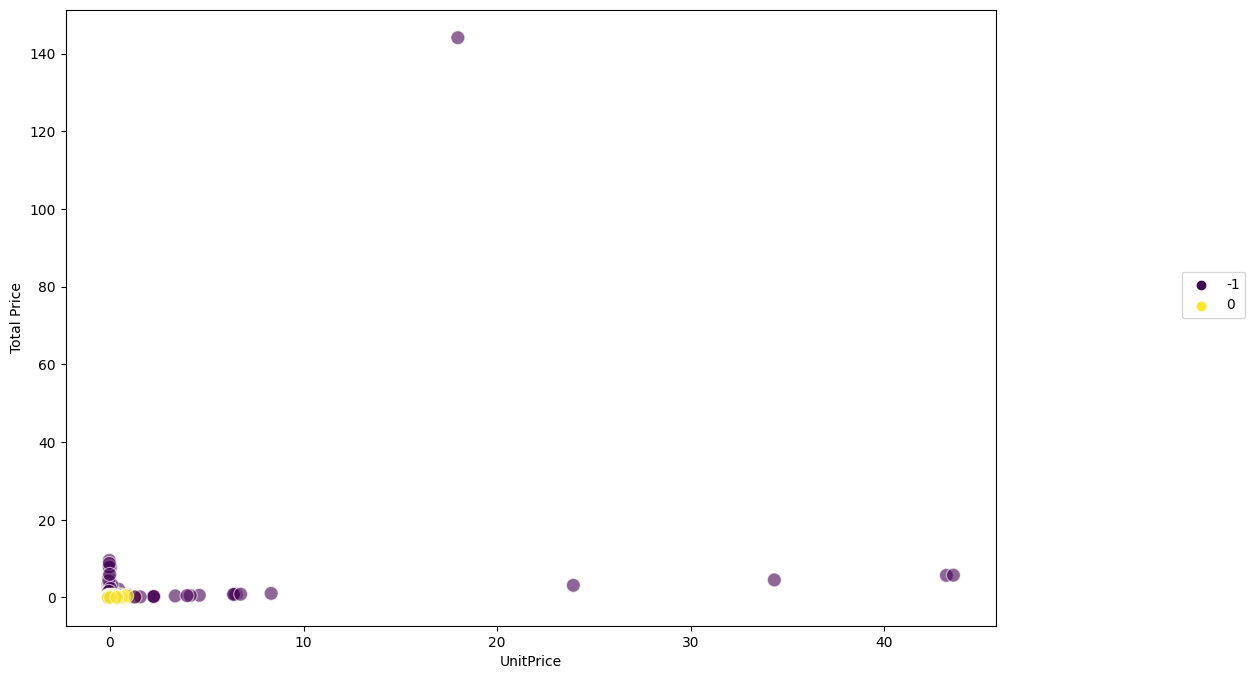

In [ ]:
plt.figure(figsize=(12,8),dpi=100)
sns.scatterplot(x=temp.UnitPrice,y=temp['Total Price'],hue=dbscan_model.labels_,palette='viridis',s=100,alpha=0.6)
plt.legend(loc=(1.2,0.5))

In [ ]:
labels = dbscan_model.labels_
print("Estimated number of cluster labels:",len(np.unique(labels)-[-1]))

Estimated number of cluster labels: 2


In [ ]:
#Identify Noise
print("Percentage of noise points:",str(round(list(labels).count(-1) / len(labels) * 100,2)) + '%')

Percentage of noise points: 8.95%


In [ ]:
temp['Segment'] = dbscan_model.labels_
print("Silhouette Score:",str(round(silhouette_score(temp,temp.Segment)*100,2)) + '%')

Silhouette Score: 72.15%


In [ ]:
original_temp = scaler.inverse_transform(temp)
original_temp = pd.DataFrame(original_temp,columns=temp.columns)
original_temp.head()

,Description,Quantity,UnitPrice,Invoice_Month,Invoice_Day,Invoice_WeekDay,Total Price,Country_Australia,Country_Austria,Country_Bahrain,...,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified,Segment
0,3921.0,2.0,0.85,2010.802292,13.628112,17.657670,2.310524,7.341316,0.000937,0.000591,...,0.000065,-0.000067,-0.000985,0.002693,-0.000928,0.002592,0.00013,0.003577,0.907061,0.000841
1,2296.0,10.0,0.83,2010.496106,5.121745,12.977393,2.355702,7.341316,0.000937,0.000591,...,0.000065,-0.000067,-0.000985,0.002693,-0.000928,0.002592,0.00013,0.003577,0.907061,0.000841
2,3844.0,2.0,6.63,2011.108478,14.033177,3.616839,2.389655,7.341316,0.000937,0.000591,...,0.000065,-0.000067,-0.000985,0.002693,-0.000928,0.002592,0.00013,0.003577,0.907061,0.000841
3,839.0,1.0,1.65,2011.185024,4.311615,3.616839,2.310182,7.341316,0.000937,0.000591,...,0.000065,-0.000067,-0.000985,0.002693,-0.000928,0.002592,0.00013,0.003577,0.907061,0.000841
4,1720.0,1.0,4.95,2011.261571,3.906550,8.297116,2.332771,7.341316,0.000937,0.000591,...,0.000065,-0.000067,-0.000985,0.002693,-0.000928,0.002592,0.00013,0.003577,0.907061,0.000841


In [ ]:
original_temp['Segment'] = dbscan_model.labels_

<Axes: xlabel='Segment'>

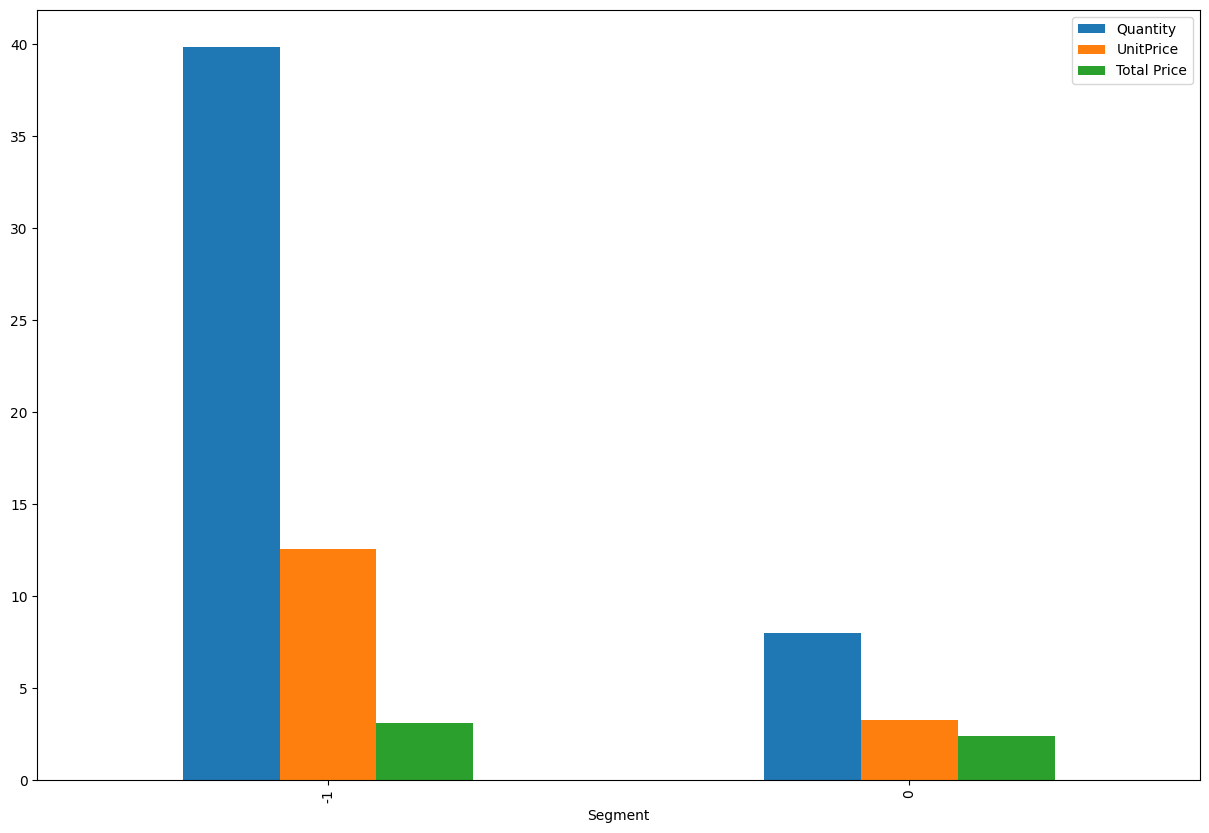

In [ ]:
# plt.figure(figsize=(12,8),dpi=150)
original_temp.groupby('Segment')[['Quantity','UnitPrice','Total Price']].mean().plot(kind='bar',figsize=(15,10))

<Axes: ylabel='count'>

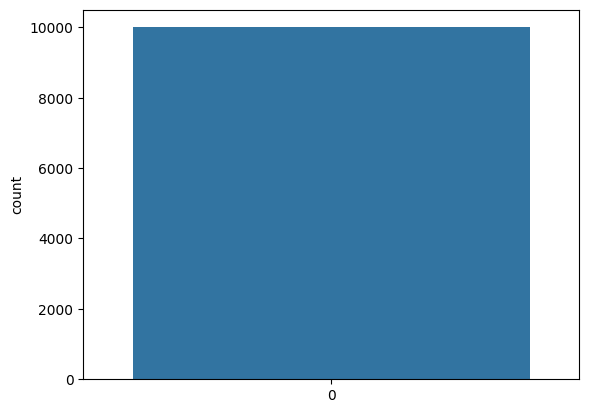

In [ ]:
sns.countplot(original_temp.Segment)

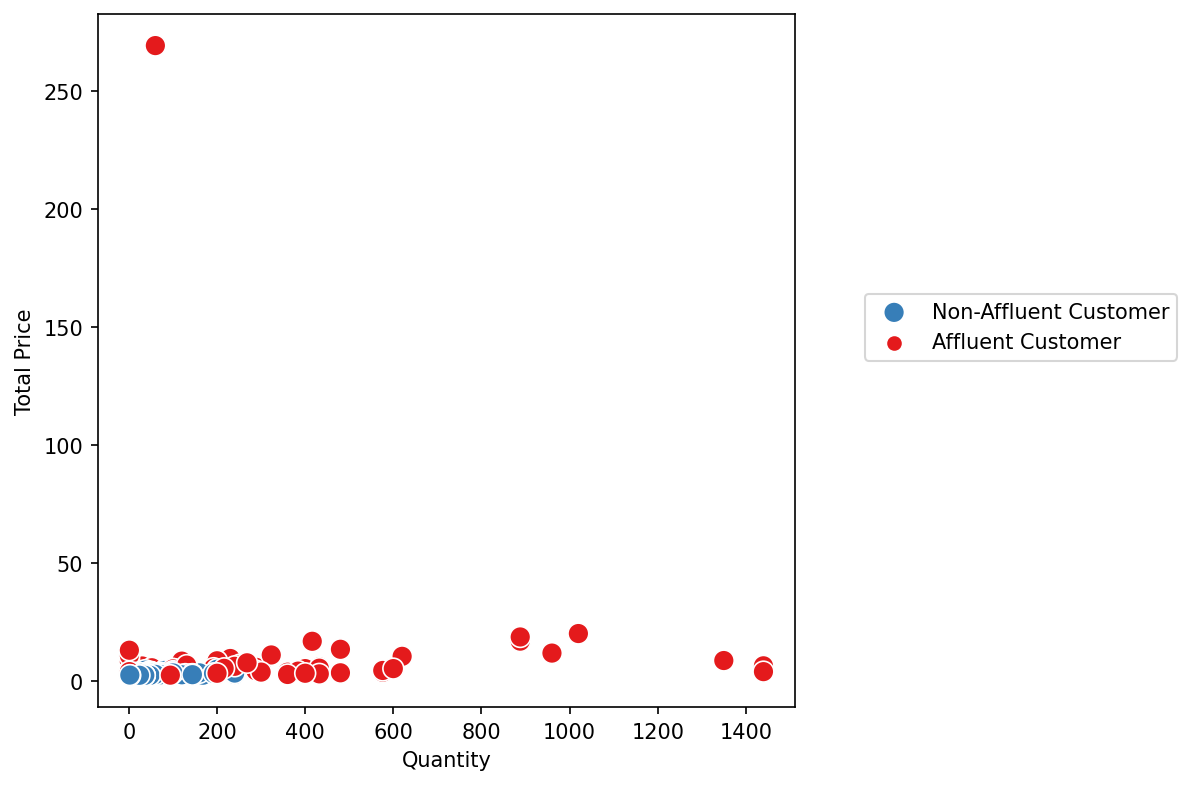

In [ ]:
plt.figure(figsize=(6, 6), dpi=150)
labels = ['Non-Affluent Customer', 'Affluent Customer']
sns.scatterplot(
    data=original_temp,
    x='Quantity',
    y='Total Price',
    hue='Segment',
    palette='Set1',
    s=100,
              )
plt.legend(loc=(1.1, 0.5), labels=labels)
plt.show()


